In [1]:
!pip install yfinance
!pip install plotly

In [16]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.graph_objects as go


In [17]:
symbol = 'TSLA'
start_date = '2014-1-1'
end_date = '2024-1-1'

In [18]:
tesla_dataframe = yf.download(symbol,start=start_date,end=end_date)
tesla_dataframe


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,9.986667,10.165333,9.770000,10.006667,10.006667,92826000
2014-01-03,10.000000,10.146000,9.906667,9.970667,9.970667,70425000
2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500
2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500
2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000
...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400


In [26]:
tesla_dataframe['Average']=tesla_dataframe['High']/2 +tesla_dataframe['Low']/2
tesla_dataframe

<ipython-input-26-be51f876ac1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_dataframe['Average']=tesla_dataframe['High']/2 +tesla_dataframe['Low']/2


,Open,High,Low,Close,Adj Close,Volume,Old_close,Average
Date,,,,,,,,
2014-01-03,10.000000,10.146000,9.906667,9.970667,9.970667,70425000,10.006667,10.026333
2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500,9.970667,9.854667
2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500,9.800000,9.855000
2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000,9.957333,10.082000
2014-01-09,10.166667,10.228667,9.790000,9.835333,9.835333,80730000,10.085333,10.009334
...,...,...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,254.500000,254.794998
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,252.539993,255.440002
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,256.609985,260.429993


In [27]:
X = tesla_dataframe['Close'].values.reshape(-1,1)
y = tesla_dataframe[['Open','Average']].values

In [28]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
y_pred=model.predict(X)
tesla_dataframe['Pred_Open']=y_pred[:,0]
tesla_dataframe['Pred_Average']=y_pred[:,1]
tesla_dataframe

<ipython-input-28-65475875dd1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_dataframe['Pred_Open']=y_pred[:,0]
<ipython-input-28-65475875dd1c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_dataframe['Pred_Average']=y_pred[:,1]


,Open,High,Low,Close,Adj Close,Volume,Old_close,Average,Pred_Open,Pred_Average
Date,,,,,,,,,,
2014-01-03,10.000000,10.146000,9.906667,9.970667,9.970667,70425000,10.006667,10.026333,10.001516,9.975700
2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500,9.970667,9.854667,9.830859,9.805152
2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500,9.800000,9.855000,9.988182,9.962375
2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000,9.957333,10.082000,10.116175,10.090286
2014-01-09,10.166667,10.228667,9.790000,9.835333,9.835333,80730000,10.085333,10.009334,9.866189,9.840460
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,254.500000,254.794998,252.556969,252.376031
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,252.539993,255.440002,256.626728,256.443187
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,256.609985,260.429993,261.456469,261.269839


In [29]:
tesla_dataframe['Old_close']=tesla_dataframe['Close'].shift(1)
tesla_dataframe['Old_open']=tesla_dataframe['Pred_Open'].shift(1)
tesla_dataframe['Old_Average']=tesla_dataframe['Pred_Average'].shift(1)
tesla_dataframe

<ipython-input-29-352844227a9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_dataframe['Old_close']=tesla_dataframe['Close'].shift(1)
<ipython-input-29-352844227a9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_dataframe['Old_open']=tesla_dataframe['Pred_Open'].shift(1)
<ipython-input-29-352844227a9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Open,High,Low,Close,Adj Close,Volume,Old_close,Average,Pred_Open,Pred_Average,Old_open,Old_Average
Date,,,,,,,,,,,,
2014-01-03,10.000000,10.146000,9.906667,9.970667,9.970667,70425000,NaN,10.026333,10.001516,9.975700,NaN,NaN
2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500,9.970667,9.854667,9.830859,9.805152,10.001516,9.975700
2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500,9.800000,9.855000,9.988182,9.962375,9.830859,9.805152
2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000,9.957333,10.082000,10.116175,10.090286,9.988182,9.962375
2014-01-09,10.166667,10.228667,9.790000,9.835333,9.835333,80730000,10.085333,10.009334,9.866189,9.840460,10.116175,10.090286
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,254.500000,254.794998,252.556969,252.376031,254.516864,254.334672
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,252.539993,255.440002,256.626728,256.443187,252.556969,252.376031
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,256.609985,260.429993,261.456469,261.269839,256.626728,256.443187


In [30]:
tesla_dataframe = tesla_dataframe.iloc[1:]
tesla_dataframe

,Open,High,Low,Close,Adj Close,Volume,Old_close,Average,Pred_Open,Pred_Average,Old_open,Old_Average
Date,,,,,,,,,,,,
2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500,9.970667,9.854667,9.830859,9.805152,10.001516,9.975700
2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500,9.800000,9.855000,9.988182,9.962375,9.830859,9.805152
2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000,9.957333,10.082000,10.116175,10.090286,9.988182,9.962375
2014-01-09,10.166667,10.228667,9.790000,9.835333,9.835333,80730000,10.085333,10.009334,9.866189,9.840460,10.116175,10.090286
2014-01-10,9.897333,9.926667,9.483333,9.714667,9.714667,111691500,9.835333,9.705000,9.745531,9.719879,9.866189,9.840460
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,254.500000,254.794998,252.556969,252.376031,254.516864,254.334672
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,252.539993,255.440002,256.626728,256.443187,252.556969,252.376031
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,256.609985,260.429993,261.456469,261.269839,256.626728,256.443187


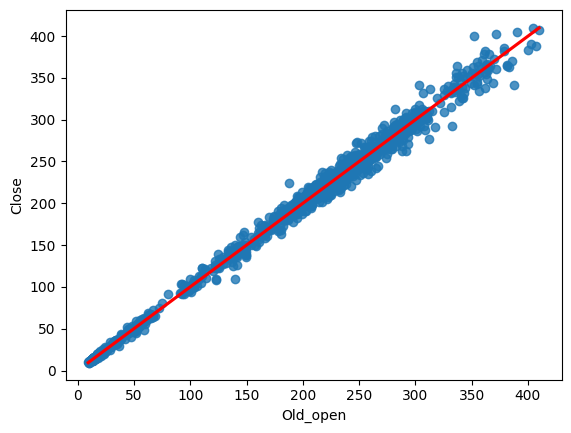

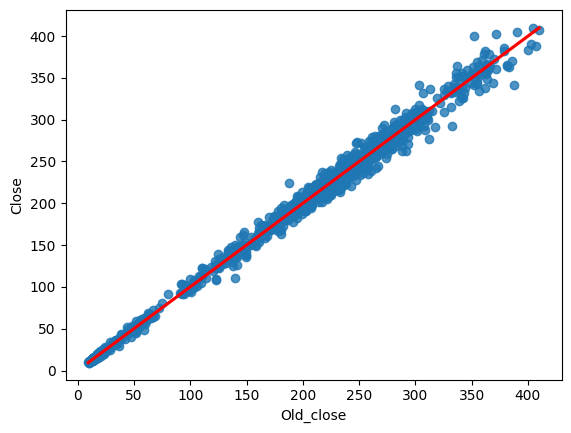

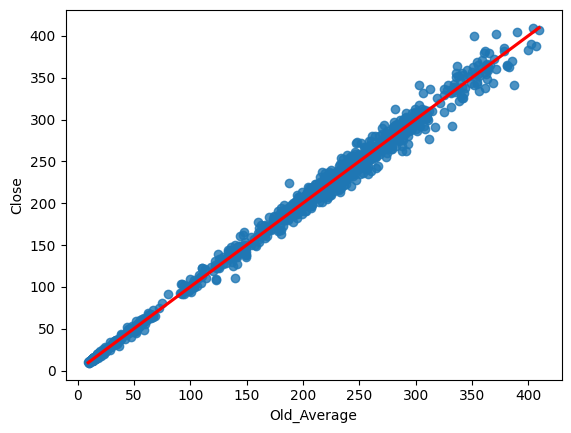

In [53]:
sns.regplot(x='Old_open', y='Close', data=tesla_dataframe, line_kws={'color': 'red'})
plt.show()
sns.regplot(x='Old_close', y='Close', data=tesla_dataframe, line_kws={'color': 'red'})
plt.show()
sns.regplot(x='Old_Average', y='Close', data=tesla_dataframe, line_kws={'color': 'red'})
plt.show()

In [31]:
X = tesla_dataframe[['Old_open','Old_close','Old_Average']].values.reshape(-1,1)
y = tesla_dataframe['Close'].values.reshape(-1,1)
print(X)
print(y)

[[ 10.00151564]
 [  9.97066689]
 [  9.97570022]
 ...
 [253.19693184]
 [253.17999268]
 [253.01558434]]
[[  9.80000019]
 [  9.95733261]
 [ 10.08533287]
 ...
 [261.44000244]
 [253.17999268]
 [248.47999573]]


In [32]:
X = tesla_dataframe[['Old_open','Old_close','Old_Average']].values
y = tesla_dataframe['Close'].values

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [34]:
model1 = sklearn.linear_model.LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [35]:
y_final=model1.predict(X)
tesla_dataframe['Pred_Close']=y_final
tesla_dataframe

<ipython-input-35-5382fa2eff9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_dataframe['Pred_Close']=y_final


,Open,High,Low,Close,Adj Close,Volume,Old_close,Average,Pred_Open,Pred_Average,Old_open,Old_Average,Pred_Close
Date,,,,,,,,,,,,,
2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500,9.970667,9.854667,9.830859,9.805152,10.001516,9.975700,10.170892
2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500,9.800000,9.855000,9.988182,9.962375,9.830859,9.805152,10.000726
2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000,9.957333,10.082000,10.116175,10.090286,9.988182,9.962375,10.157464
2014-01-09,10.166667,10.228667,9.790000,9.835333,9.835333,80730000,10.085333,10.009334,9.866189,9.840460,10.116175,10.090286,10.285394
2014-01-10,9.897333,9.926667,9.483333,9.714667,9.714667,111691500,9.835333,9.705000,9.745531,9.719879,9.866189,9.840460,10.035638
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,254.500000,254.794998,252.556969,252.376031,254.516864,254.334672,254.257073
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,252.539993,255.440002,256.626728,256.443187,252.556969,252.376031,252.311761
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,256.609985,260.429993,261.456469,261.269839,256.626728,256.443187,256.366448


In [36]:
r2 = r2_score(tesla_dataframe['Close'],tesla_dataframe['Pred_Close'])
print("R2:", r2)
mae=mean_absolute_error(tesla_dataframe['Close'],tesla_dataframe['Pred_Close'])
print("MAE:", mae)
mse=mean_squared_error(tesla_dataframe['Close'],tesla_dataframe['Pred_Close'])
print("MSE:", mse)

R2: 0.9975050226202223
MAE: 2.6200285712783073
MSE: 29.369299062040998


In [37]:
fig = go.Figure([go.Scatter(x=tesla_dataframe.index, y=tesla_dataframe['Close'])])
fig1 = go.Figure([go.Scatter(x=tesla_dataframe.index, y=tesla_dataframe['Pred_Close'])])
fig.show()
fig1.show()

In [38]:
cls_price=input('Enter closing price of previous day\n')
y_prd=model.predict([[float(cls_price)]])
print(y_prd)
a=y_prd[0][0]
b=y_prd[0][1]
y_fnl=model1.predict([[a,float(cls_price),b]])
print('Todays closing price is ',y_fnl)

Enter closing price of previous day
70
[[70.02741557 69.96321146]]
Todays closing price is  [70.09105778]
